In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
print(df['ChestPainType'].unique())
print(df['RestingECG'].unique())
print(df['ExerciseAngina'].unique())
print(df['FastingBS'].unique())

['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
[0 1]


In [14]:
cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'FastingBS', 'ST_Slope']

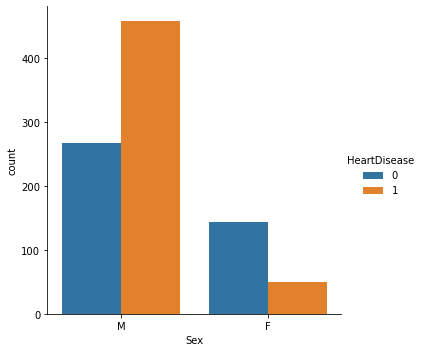

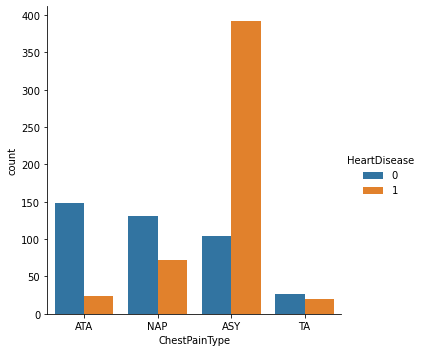

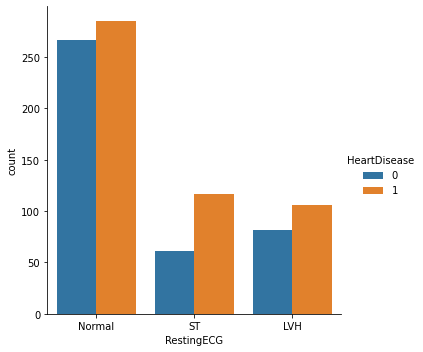

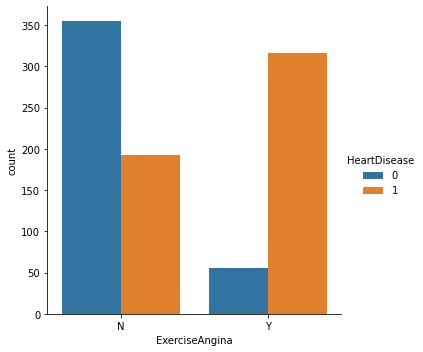

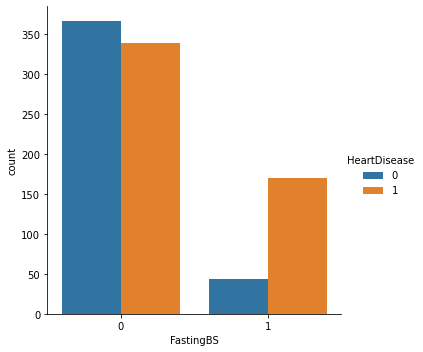

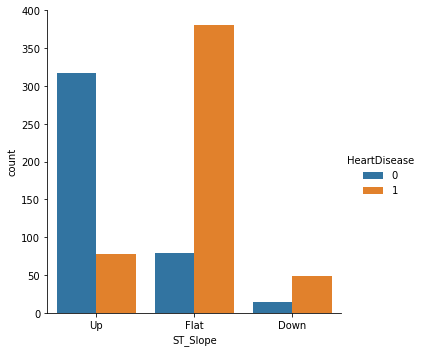

In [15]:
for i in cols:
    sns.catplot(x=i, hue='HeartDisease', data=df, kind="count")

<AxesSubplot:xlabel='Age', ylabel='Count'>

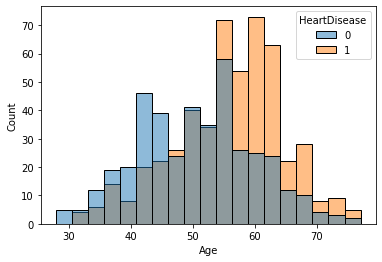

In [12]:
sns.histplot(data = df, x = 'Age', hue = 'HeartDisease')

In [16]:
df = pd.get_dummies(df, columns = cols, drop_first = True)

In [17]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,FastingBS_1,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,1,1,0,0,1,0,0,0,0,1
1,49,160,180,156,1.0,1,0,0,1,0,1,0,0,0,1,0
2,37,130,283,98,0.0,0,1,1,0,0,0,1,0,0,0,1
3,48,138,214,108,1.5,1,0,0,0,0,1,0,1,0,1,0
4,54,150,195,122,0.0,0,1,0,1,0,1,0,0,0,0,1


In [18]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
DTC = DecisionTreeClassifier(random_state = 10)
DTC.fit(X_train, y_train)
DTC_preds = DTC.predict(X_test)
from sklearn.metrics import confusion_matrix

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, DTC_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        77
           1       0.86      0.86      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [25]:
RFC = RandomForestClassifier(random_state=10)
RFC.fit(X_train, y_train)
RFC_preds = RFC.predict(X_test)
print(classification_report(y_test, RFC_preds))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



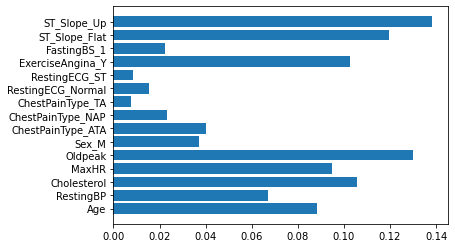

In [26]:
plt.barh(np.arange(len(RFC.feature_importances_)), RFC.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.show()

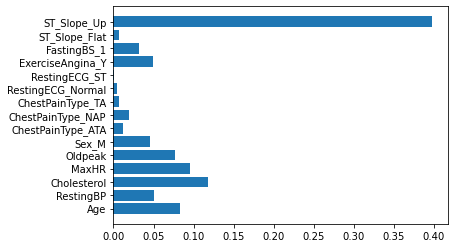

In [27]:
plt.barh(np.arange(len(DTC.feature_importances_)), DTC.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.show()

In [29]:
from sklearn.ensemble import BaggingClassifier
BG = BaggingClassifier(random_state = 10)
BG.fit(X_train, y_train)
BG_preds = BG.predict(X_test)
print(classification_report(y_test, BG_preds))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        77
           1       0.91      0.77      0.83       107

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.84      0.82      0.82       184



In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
SC = StackingClassifier([('rf', RandomForestClassifier(n_estimators=10, random_state = 10)), 
                         ('dt', DecisionTreeClassifier(random_state = 10)), 
                         ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=10, max_iter = 10000)))])
SC.fit(X_train, y_train)
SC_preds = SC.predict(X_test)
print(classification_report(y_test, SC_preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



# Выводы:
а) Лучше всего справилась модель RandomForest, получившая наилучшие показатели метрик.

б) Стэкинг может оказаться лучше, так как разные модели нивелируют недостатки друг друга.